In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

## Load California House Dataset

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

## Set up and Train the NN model

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 4s 6ms/step - loss: 2.3818 - val_loss: 1.1689
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7896 - val_loss: 0.7013
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.6923 - val_loss: 0.6736
Epoch 4/20
363/363 [==============================] - 3s 7ms/step - loss: 0.6428 - val_loss: 0.6015
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6046 - val_loss: 0.5591
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5720 - val_loss: 0.5428
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5460 - val_loss: 0.5410
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5245 - val_loss: 0.4855
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5053 - val_loss: 0.4736
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4899 - val_loss: 0.4663

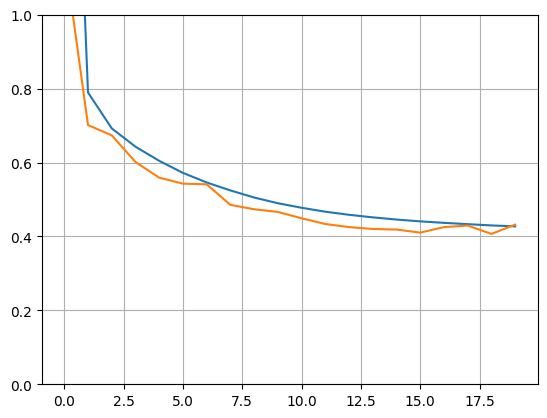

In [9]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Make New Predictions

In [10]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 58ms/step


array([[0.7378427],
       [1.6565745],
       [3.2455978]], dtype=float32)